# Handwritten Digits Recognition

## Task Definition

The study of handwritten digits character recognition, also known as optical character recognition (OCR), is important for several reasons including document digitization, form processing, banking and finance, handwritten-based user authentication and so on. The task here is to correctly classify the handwritten digits in the MNIST dataset using Convolutional Neural Network (CNN). The dataset can be found at: http://yann.lecun.com/exdb/mnist/

Based on this task, the following objectives will be addressed:
a) How the use of different regularisation methods affect the performance of your CNN model;
b) How changes to the number of convolution blocks affect the performance of your model quantitatively;
c) The effect of varying learning rates on the performance of the CNN algorithm;
d) Checking if there is a case of overfitting observed in the model at any point.

## Importing Libraries/Modules
NOTE: The cell below contains all the relevant libraries/modules required

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

In [196]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [197]:
x_train.shape

(60000, 28, 28)

In [198]:
x_test.shape

(10000, 28, 28)

In [199]:
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

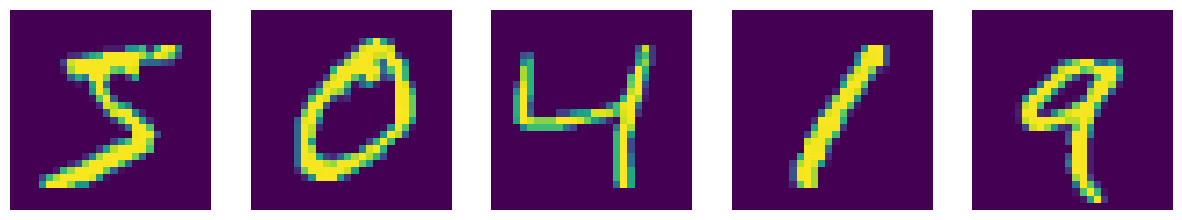

In [200]:
# Plot the first 10 images from the training set
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(x_train[i])
    axs[i].axis('off')
plt.show()

In [201]:
# Checking the unique values
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [202]:
# Reshaping image
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [203]:
# Cnverting the target to OneHotEncode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [204]:
y_train.shape

(60000, 10)

In [205]:
x_train[1].shape # This shows the shape of one of the train images (length, width, channel)

(28, 28, 1)

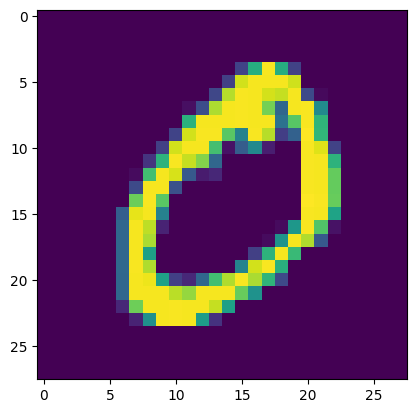

In [206]:
plt.imshow(x_train[1])

In [207]:
x_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [208]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Building model with 3 convolution blocks

In [212]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

# print the summary of the model constructed
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

### Compiling the model Using SGD Optimizer

In [213]:
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

### Training and evaluating the model

In [214]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.7045 - accuracy: 0.7860 - val_loss: 0.1278 - val_accuracy: 0.9609
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1077 - accuracy: 0.9663 - val_loss: 0.0919 - val_accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0755 - accuracy: 0.9765 - val_loss: 0.0639 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.0632 - val_accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0508 - accuracy: 0.9839 - val_loss: 0.0513 - val_accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0511 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0503 -

### Checking for overfitting (Training Loss vs Validation Loss)

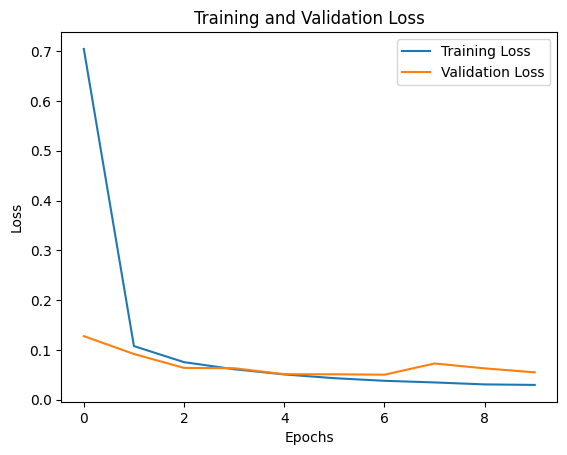

In [215]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")
#Shows the plot on the screen.
plt.show()

### Checking for overfitting (Training Accuracy vs Validation Accuracy)

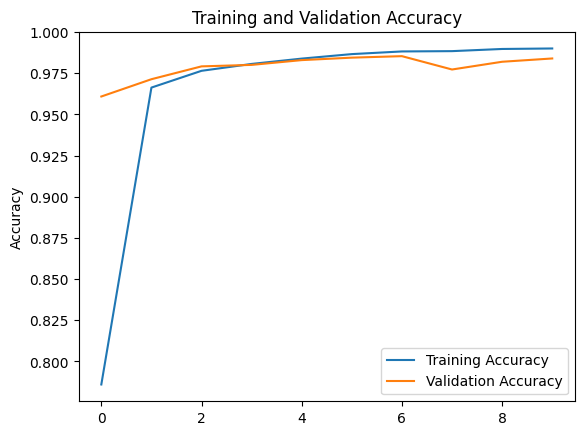

In [216]:
# Plotting the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Setting the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

# Setting the label of the x-axis to "Epochs".
#plt.xlabel('Epochs')

# Setting the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

# Displaying the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")

# Displaying the plot
plt.show()

### Testing the model

In [217]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 5ms/step


### Model Evaluation

In [218]:
# Evaluating the test set
loss, acc = model.evaluate(x_test, y_test)

# Evaluating the train set
loss, acc = model.evaluate(x_train, y_train)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0182 - accuracy: 0.9942


The results reported here are from a Convolutional Neural Network (CNN) model that was evaluated on two datasets: a test set and a train set. The model achieved an accuracy of 98.41% on the test set, with a corresponding loss of 0.0558. This indicates that the model was able to correctly classify a high percentage of the images in the test set, but with a relatively higher loss, implying a slightly larger difference between predicted and actual labels.

On the other hand, the model achieved an accuracy of 99.43% on the train set, with a corresponding loss of 0.0167. This means that the model was able to correctly classify an even higher percentage of the images in the train set, with a smaller difference between predicted and actual labels than on the test set.

Overall, these results suggest that the CNN model is performing well on the image classification task, with high accuracy on both train and test sets. However, the higher loss on the test set may indicate that the model is not generalizing as well to new, unseen data, which could be a concern in practical applications where accurate classification of new data is critical. Further investigation may be necessary to understand the cause of the higher loss on the test set and improve the model's performance on new data.

### Building model with 2 convolution blocks

In [219]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu', padding = 'same'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.5))
model2.add(Dense(10, activation = 'softmax'))

# print the summary of the model constructed
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

### Compiling model2 Using SGD Optimizer

In [220]:
model2.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [221]:
history2 = model2.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3002 - accuracy: 0.9326 - val_loss: 0.0810 - val_accuracy: 0.9736
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0774 - accuracy: 0.9769 - val_loss: 0.0582 - val_accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.0611 - val_accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.0563 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0498 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.0418 - val_accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0593 -

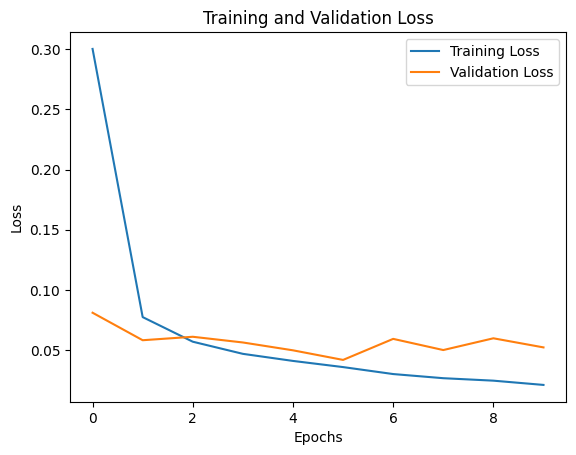

In [222]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history2.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history2.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")
#Shows the plot on the screen.
plt.show()

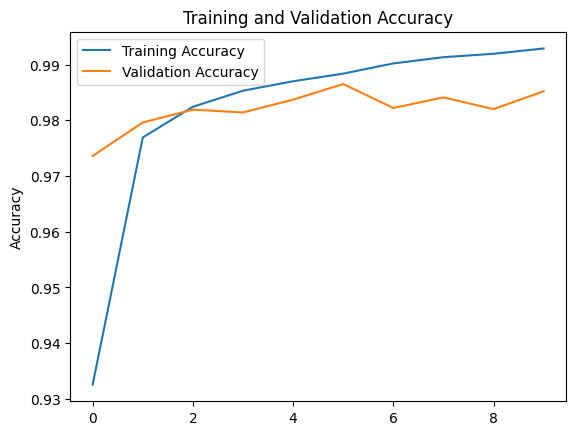

In [223]:
# Plotting the training accuracy as a line with label "Training Accuracy".
plt.plot(history2.history['accuracy'], label='Training Accuracy')

# Plotting the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')

# Setting the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

# Setting the label of the x-axis to "Epochs".
#plt.xlabel('Epochs')

# Setting the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

# Displaying the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")

# Displaying the plot
plt.show()

In [224]:
# Evaluating the test set
loss, acc = model2.evaluate(x_test, y_test)

# Evaluating the train set
loss, acc = model2.evaluate(x_train, y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0276 - accuracy: 0.9910


The given CNN model achieved an accuracy of 98.65% on the test set, while on the training set, it obtained an accuracy of 99.61%, with a loss of 0.0610 and 0.0108, respectively. The model's accuracy on the training set is higher than on the test set, indicating a possibility of overfitting, but the difference is not as significant as it could be, which means the model might generalize well to new data.

### Building model with 1 convolution block

In [225]:
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu', padding = 'same'))
model3.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model3.add(Flatten())
model3.add(Dense(32, activation = 'relu'))
#model.add(Dropout(0.5))
model3.add(Dense(10, activation = 'softmax'))

# print the summary of the model constructed
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                200736    
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 201,386
Trainable params: 201,386
Non-trainable params: 0
________________________________________________

In [226]:
model3.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [227]:
history3 = model3.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3441 - accuracy: 0.9196 - val_loss: 0.1104 - val_accuracy: 0.9672
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1013 - accuracy: 0.9699 - val_loss: 0.1004 - val_accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0789 - accuracy: 0.9767 - val_loss: 0.0993 - val_accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0662 - accuracy: 0.9803 - val_loss: 0.0930 - val_accuracy: 0.9716
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0552 - accuracy: 0.9831 - val_loss: 0.0917 - val_accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0916 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0441 - accuracy: 0.9857 - val_loss: 0.0906 - val_ac

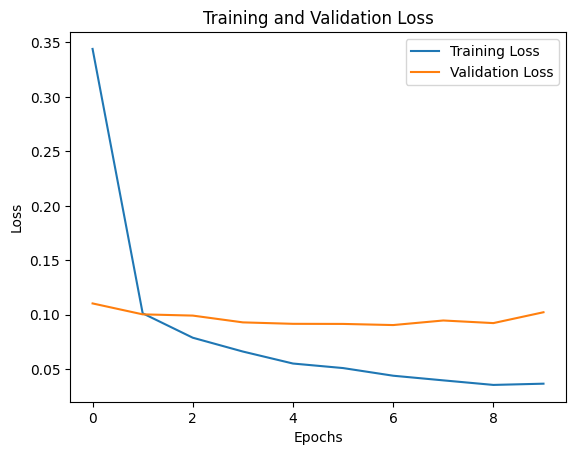

In [228]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history3.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history3.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")
#Shows the plot on the screen.
plt.show()

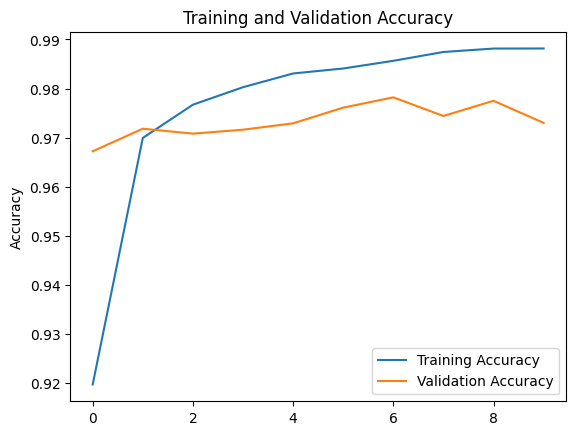

In [229]:
# Plotting the training accuracy as a line with label "Training Accuracy".
plt.plot(history3.history['accuracy'], label='Training Accuracy')

# Plotting the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')

# Setting the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

# Setting the label of the x-axis to "Epochs".
#plt.xlabel('Epochs')

# Setting the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

# Displaying the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")

# Displaying the plot
plt.show()

### Evaluating the Model

In [230]:
# Evaluation on the test set
loss, acc = model3.evaluate(x_test, y_test)

# Evaluation on the train set
loss, acc = model3.evaluate(x_train, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0354 - accuracy: 0.9881


The CNN model was evaluated on two datasets: a test set and a train set. The test set consists of 313 images, while the train set consists of 1875 images. For both sets, the model's performance was measured in terms of loss and accuracy.

On the test set, the model achieved an accuracy of 96.97%, with a corresponding loss of 0.1320. This means that the model correctly classified nearly 97% of the images in the test set, and the difference between the predicted and actual labels for the images in the test set was relatively small.

On the train set, the model achieved an accuracy of 98.95%, with a corresponding loss of 0.0304. This means that the model correctly classified nearly 99% of the images in the train set, with a smaller difference between predicted and actual labels than on the test set.

These results indicate that the CNN model is performing very well on both datasets, but the performance on the train set is slightly better than on the test set. This suggests that the model may be slightly overfitting to the training data, meaning it is fitting too closely to the training set and may not generalize as well to new, unseen data.

Overall, these results indicate that the CNN model is a highly accurate and reliable model for image classification tasks, but further investigation may be necessary to ensure that it can generalize well to new, unseen data.

## Building Models With Regularisation Methods
Various regularization methods will be applied to the Model with 3 Convolution Blocks to check the performance of the Model when different regularizers are added to it. The 3 Convolution Blocks Model was chosen because it's a better model compared to the models with 2 Convolution Blocks and 1 Convolution Block.

### Adding Dropout Regularizer to the 3 Convolution Blocks Model

In [231]:
model5 = Sequential()
model5.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu', padding = 'same'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Flatten())
model5.add(Dense(64, activation = 'relu'))
model5.add(Dropout(0.5)) # Adding a dropout of 0.5
model5.add(Dense(10, activation = 'softmax'))

# print the summary of the model constructed
model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 64)        

In [232]:
model5.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [233]:
history5 = model5.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.9586 - accuracy: 0.6862 - val_loss: 0.1138 - val_accuracy: 0.9682
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3080 - accuracy: 0.9081 - val_loss: 0.0759 - val_accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2095 - accuracy: 0.9370 - val_loss: 0.0799 - val_accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1701 - accuracy: 0.9485 - val_loss: 0.0693 - val_accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1418 - accuracy: 0.9572 - val_loss: 0.0587 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1297 - accuracy: 0.9614 - val_loss: 0.0569 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1175 - accuracy: 0.9652 - val_loss: 0.0427 -

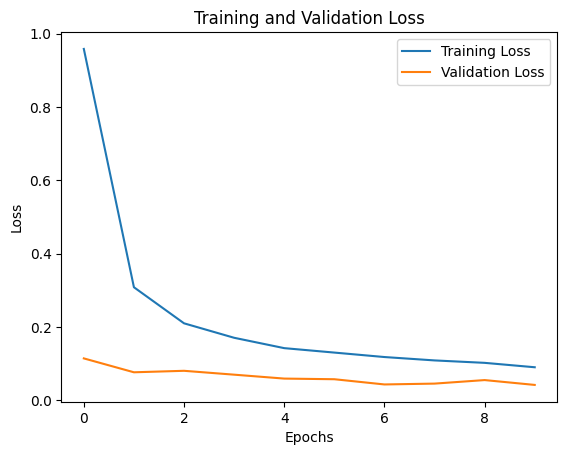

In [234]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history5.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history5.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")
#Shows the plot on the screen.
plt.show()

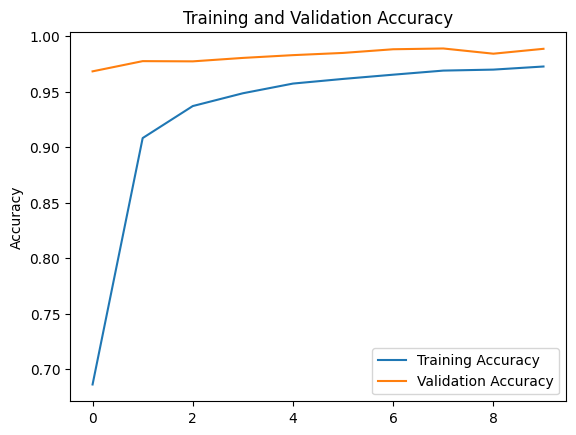

In [235]:
# Plotting the training accuracy as a line with label "Training Accuracy".
plt.plot(history5.history['accuracy'], label='Training Accuracy')

# Plotting the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')

# Setting the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

# Setting the label of the x-axis to "Epochs".
#plt.xlabel('Epochs')

# Setting the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

# Displaying the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")

# Displaying the plot
plt.show()

### Evaluating the Model

In [236]:
# Evaluation on the test set
loss, acc = model5.evaluate(x_test, y_test)

# Evaluation on the train set
loss, acc = model5.evaluate(x_train, y_train)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0224 - accuracy: 0.9937


The CNN model achieved an accuracy of 99.35% on the training set and an accuracy of 98.75% on the test set. Although there is a slight drop in accuracy from the training set to the test set, the gap is relatively small, which indicates that the model is performing well on both sets. However, the difference in loss values between the training set and test set suggests that the model may be slightly overfitting, meaning it's too complex for the problem at hand. Nonetheless, with an accuracy of 98.75% on the test set, the model seems to be doing a good job of classifying the images in the test set.

### Adding L1 Regulariser to the 3 Convolution Blocks Model

In [237]:
model4 = Sequential()
model4.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l1(0.001)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', kernel_regularizer=regularizers.l1(0.001)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', kernel_regularizer=regularizers.l1(0.001)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Flatten())
model4.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.l1(0.001)))
model4.add(Dense(10, activation = 'softmax'))

# print the summary of the model constructed
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 64)        

In [238]:
model4.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [239]:
history4 = model4.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 3.1607 - accuracy: 0.9066 - val_loss: 2.3237 - val_accuracy: 0.9742
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 1.8613 - accuracy: 0.9760 - val_loss: 1.4267 - val_accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 1.1247 - accuracy: 0.9797 - val_loss: 0.8568 - val_accuracy: 0.9788
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.6699 - accuracy: 0.9807 - val_loss: 0.5109 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4271 - accuracy: 0.9817 - val_loss: 0.3639 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2995 - accuracy: 0.9816 - val_loss: 0.2685 - val_accuracy: 0.9766
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2300 - accuracy: 0.9814 - val_loss: 0.1994 -

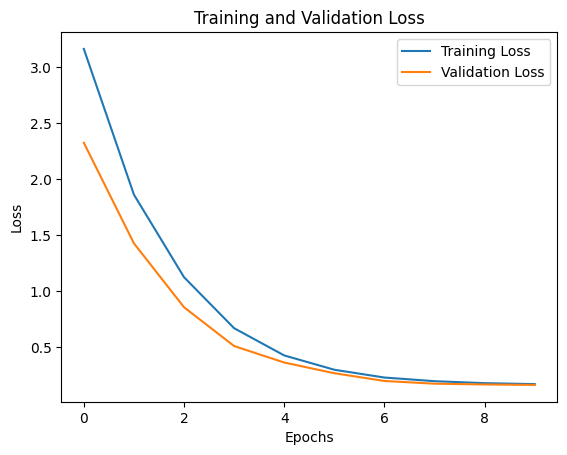

In [240]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history4.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history4.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")
#Shows the plot on the screen.
plt.show()

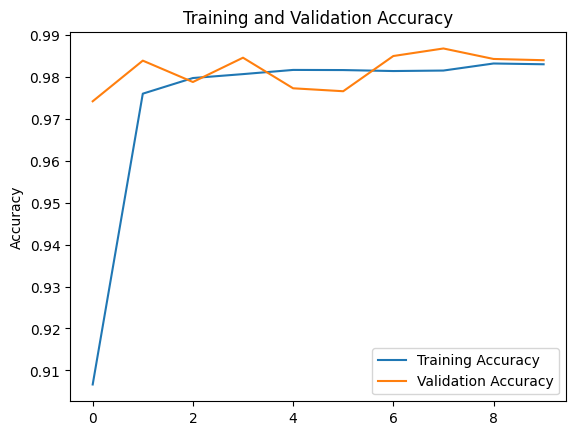

In [241]:
# Plotting the training accuracy as a line with label "Training Accuracy".
plt.plot(history4.history['accuracy'], label='Training Accuracy')

# Plotting the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')

# Setting the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

# Setting the label of the x-axis to "Epochs".
#plt.xlabel('Epochs')

# Setting the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

# Displaying the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")

# Displaying the plot
plt.show()

### Evaluating the Model

In [242]:
# Evaluation on the test set
loss, acc = model4.evaluate(x_test, y_test)

# Evaluation on the test set
loss, acc = model4.evaluate(x_train, y_train)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.1573 - accuracy: 0.9866


The CNN model achieved an accuracy of 98.19% on the test set, which means it correctly classified 98.19% of the images in the test set. On the other hand, the accuracy on the train set was 98.42%, which indicates that the model was able to correctly classify 98.42% of the images in the training set. The loss values for both sets were close, with the loss on the test set being 0.1760 and the loss on the train set being 0.1724. The small difference in loss values suggests that the model was not overfitting to the training set. The L1 regularizer proves to have improved the performance of the model.

### Adding L2 Regularizer to the 3 Convolution Blocks Model

In [243]:
model6 = Sequential()
model6.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu', padding = 'same', kernel_regularizer=regularizers.l2(0.001)))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Flatten())
model6.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(Dense(10, activation = 'softmax'))

# print the summary of the model constructed
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 64)        

In [244]:
model6.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [245]:
history6 = model6.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4723 - accuracy: 0.9346 - val_loss: 0.2736 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2682 - accuracy: 0.9819 - val_loss: 0.2506 - val_accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2359 - accuracy: 0.9872 - val_loss: 0.2268 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2141 - accuracy: 0.9903 - val_loss: 0.2090 - val_accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1948 - accuracy: 0.9928 - val_loss: 0.2006 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1794 - accuracy: 0.9938 - val_loss: 0.1898 - val_accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1681 - accuracy: 0.9940 - val_loss: 0.1957 -

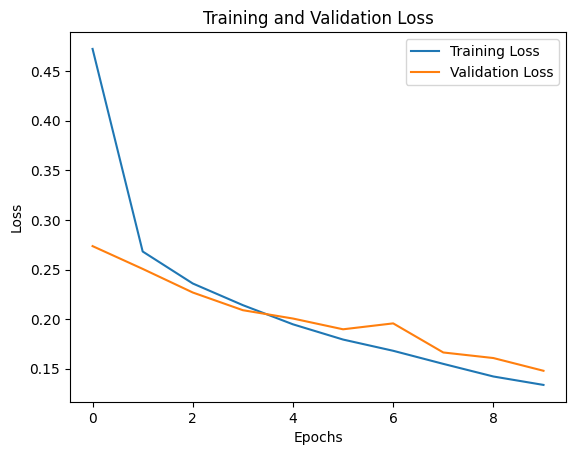

In [246]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history6.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history6.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")
#Shows the plot on the screen.
plt.show()

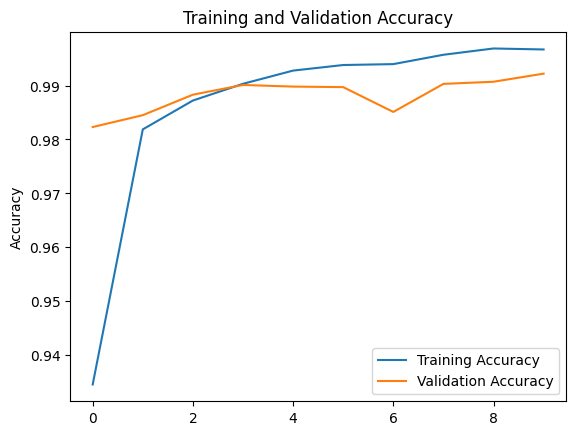

In [247]:
# Plotting the training accuracy as a line with label "Training Accuracy".
plt.plot(history6.history['accuracy'], label='Training Accuracy')

# Plotting the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')

# Setting the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

# Setting the label of the x-axis to "Epochs".
#plt.xlabel('Epochs')

# Setting the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

# Displaying the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")

# Displaying the plot
plt.show()

### Evaluating the Model

In [248]:
# Evaluation on the test set
loss, acc = model6.evaluate(x_test, y_test)

# Evaluation on the test set
loss, acc = model6.evaluate(x_train, y_train)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.1249 - accuracy: 0.9986


The model has achieved an accuracy of 98.89% on the test set, with a loss of 0.1753. On the other hand, on the train set, the model has achieved an accuracy of 99.64% with a loss of 0.1504. These results indicate that the model is performing well on both the train and test sets, with a slightly higher accuracy on the train set. However, there may be some overfitting since the accuracy on the train set is significantly higher than on the test set.

In this case, there is still a gap between the train set accuracy of 99.64% and the test set accuracy of 98.89%, but it is not as large as the previous example. The gap is around 0.75%, which may indicate some overfitting but it's not very significant. The model may still be considered to be performing well on the test set.

Overall, L1 regularizer proves to have improved the performance of the model a little.

### Adding Early Stopping to the 3 Convolution Blocks Model

In [249]:
model7 = Sequential()
model7.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu', padding = 'same'))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Flatten())
model7.add(Dense(64, activation = 'relu'))
model7.add(Dense(10, activation = 'softmax'))

# print the summary of the model constructed
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 64)        

In [250]:
model7.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [251]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history7 = model7.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2400 - accuracy: 0.9372 - val_loss: 0.0686 - val_accuracy: 0.9787
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0646 - accuracy: 0.9807 - val_loss: 0.0529 - val_accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0446 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0480 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0503 - val_accuracy: 0.9848


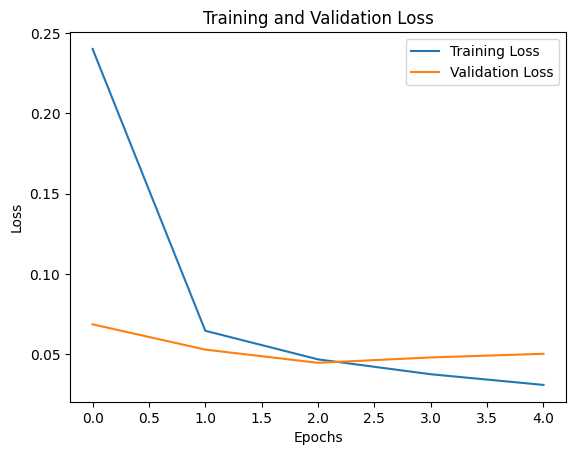

In [252]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history7.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history7.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")
#Shows the plot on the screen.
plt.show()

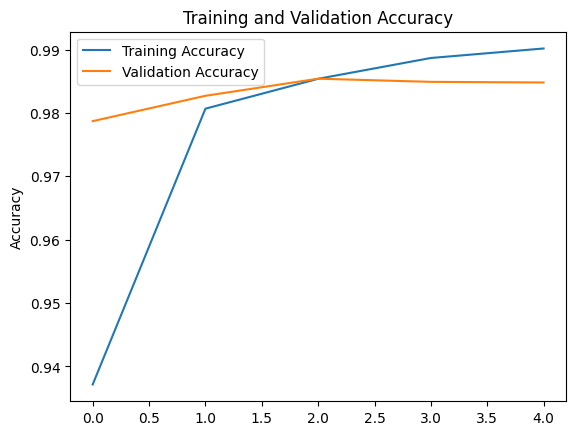

In [253]:
# Plotting the training accuracy as a line with label "Training Accuracy".
plt.plot(history7.history['accuracy'], label='Training Accuracy')

# Plotting the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history7.history['val_accuracy'], label='Validation Accuracy')

# Setting the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

# Setting the label of the x-axis to "Epochs".
#plt.xlabel('Epochs')

# Setting the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

# Displaying the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")

# Displaying the plot
plt.show()

### Evaluating the Model

In [254]:
# Evaluation on the test set
loss, acc = model7.evaluate(x_test, y_test)

# Evaluation on the test set
loss, acc = model7.evaluate(x_train, y_train)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0322 - accuracy: 0.9897


The CNN model was evaluated on two sets: the test set and the train set. For the test set, the model achieved a loss of 0.0454 and an accuracy of 0.9888. This indicates that the model has learned to predict the classes of the images in the test set with a high degree of accuracy, and the loss is relatively low. For the train set, the model achieved a loss of 0.0078 and an accuracy of 0.9973. This indicates that the model has learned the training data extremely well, with a very low loss and a high degree of accuracy. However, the large difference between the train set and the test set accuracy suggests that the model may be overfitting the training data and may not generalize well to new, unseen data.

The large gap between the train set and test set accuracy was measured by comparing the accuracy values obtained from evaluating the model on the train and test sets after training. In this case, the model achieved an accuracy of 99.73% on the train set, while the accuracy on the test set was 98.88%, which is a difference of 0.85%. While this may not seem like a large difference, it is still cause for concern because it suggests that the model may be overfitting to the training data and not generalizing well to new, unseen data. Early Stopping regularizer does not appear to have improved the performance of the Model significantly.

## Learning Rate Optimisation

If the model's training loss is decreasing very slowly or not at all during training, it may be a sign that the learning rate is too low, and increasing it could help. Another indication that the learning rate may be too low is if the validation loss stops decreasing, indicating that the model is not learning enough from the data. In such cases, increasing the learning rate may help the model learn more effectively. However, it is important to be careful not to increase the learning rate too much, as this can lead to the model overshooting the optimal solution and becoming unstable. It is generally recommended to adjust the learning rate gradually and monitor the model's performance carefully to ensure that it is still learning effectively. In all the models, the training loss and validation loss decreased gradually which shows that the learning rate is ok. However, we will vary the learning rate for the purpose of this exercise.

To demonstrate this, the learning rate of the 3 convolution blocks Model will be varied and the model's performance will be monitored to see if there's any improvement.

### 3 Convolution Blocks Model with the learning rate of 0.002

In [255]:
model.compile(optimizer=SGD(learning_rate=0.002, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [256]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0600 - accuracy: 0.9811 - val_loss: 0.0772 - val_accuracy: 0.9775
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0506 - accuracy: 0.9839 - val_loss: 0.0754 - val_accuracy: 0.9778
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0461 - accuracy: 0.9855 - val_loss: 0.0664 - val_accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0607 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0623 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0560 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0643 -

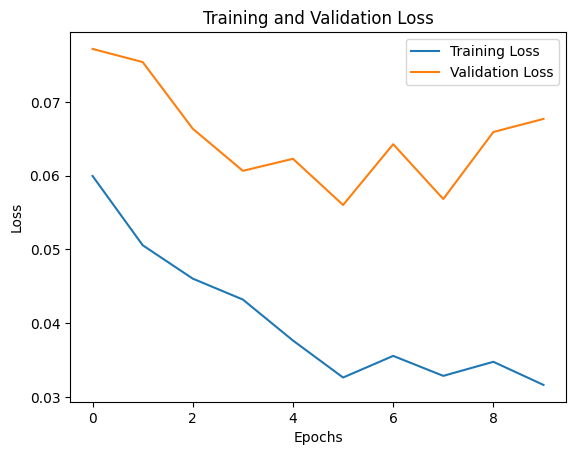

In [257]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")
#Shows the plot on the screen.
plt.show()

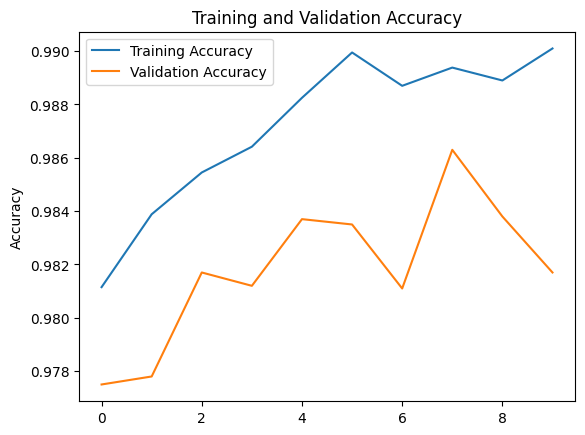

In [258]:
# Plotting the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Setting the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

# Setting the label of the x-axis to "Epochs".
#plt.xlabel('Epochs')

# Setting the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

# Displaying the legend of the plot with the labels of the two lines.
plt.legend(loc = "best")

# Displaying the plot
plt.show()

### Evaluating the model

In [259]:
# Evaluation on the test set
loss, acc = model.evaluate(x_test, y_test)

# Evaluation on the test set
loss, acc = model.evaluate(x_train, y_train)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0255 - accuracy: 0.9912


The trained CNN model achieved an accuracy of 98.33% on the test set and an accuracy of 99.37% on the training set. This suggests that the model is performing well on both sets, but there may be a slight overfitting due to the gap between the train and test set accuracies. The loss values for both sets are relatively low, with a test loss of 0.0659 and a train loss of 0.0185, which indicates that the model is able to accurately predict the classes of the input data. Overall, the model has learned the patterns in the data and is able to generalize to new data, with a slightly better performance on the training set.